# Linear Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

## Hypothesis

* 우리가 세운 가설을 코드로 만들어봅시다.

$$ H(x) = Wx + b $$

* 예측해야되는 데이터는 주어집니다.

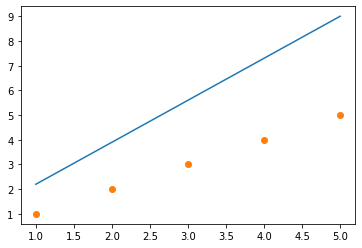

In [2]:
# 주어진 데이터를 확인해 봅시다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

#이 데이터를 표현하는 모델을 정의해봅시다.

W = tf.Variable(1.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

# Hpyothesis 가설
hypothesis = W * x_data + b

# 표로 출력
plt.plot(x_data, hypothesis.numpy())
plt.plot(x_data, y_data, 'o')
plt.show()

## Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [3]:
# Cost function == Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

sq = tf.square(3) # 제곱을 해주는 함수
print(sq)


tf.Tensor(9, shape=(), dtype=int32)


# Cost Function을 조금 더 쉽게 표현해봅시다.
## Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

* b 를 W 행렬에 포함 시킬 수 있기 때문에 생략이 가능하다
* Cost 함수를 정의해보자

* 차원을 축소시켜서 생각해 볼 수 있다.


In [4]:
def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

## 우리가 가정한 Cost Funtion을 살펴보자

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


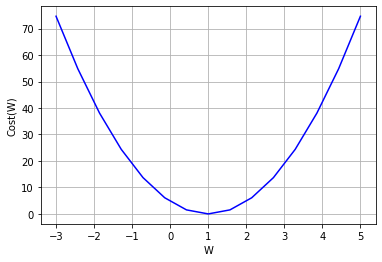

In [5]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W_values = np.linspace(-3, 5, num=15) # -3 ~ 5 사이의 15개 숫자들 - 15등분
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))
    
# Cost Function을 시각화 해보자    
    
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.grid(True)
plt.show()

# Cost Function을 이용해서 최적 값은 어떻게 찾는것일까?

## Minimizing Cost == Gradient descent

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

$$ \alpha = Learning Rate $$

In [6]:
W = tf.Variable([4.1]) # 임의의 값

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Gradient Descent의 동작 원리
    lr = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(lr, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("step : {:3}, cost :  {:5.4f}, W : {:5.6f}".format(step, cost.numpy(), W.numpy()[0]))
        

step :   0, cost :  44.8467, W : 3.955333
step :  10, cost :  17.2435, W : 2.832543
step :  20, cost :  6.6301, W : 2.136324
step :  30, cost :  2.5493, W : 1.704612
step :  40, cost :  0.9802, W : 1.436916
step :  50, cost :  0.3769, W : 1.270923
step :  60, cost :  0.1449, W : 1.167994
step :  70, cost :  0.0557, W : 1.104170
step :  80, cost :  0.0214, W : 1.064594
step :  90, cost :  0.0082, W : 1.040053
step : 100, cost :  0.0032, W : 1.024836
step : 110, cost :  0.0012, W : 1.015400
step : 120, cost :  0.0005, W : 1.009549
step : 130, cost :  0.0002, W : 1.005921
step : 140, cost :  0.0001, W : 1.003672
step : 150, cost :  0.0000, W : 1.002277
step : 160, cost :  0.0000, W : 1.001412
step : 170, cost :  0.0000, W : 1.000875
step : 180, cost :  0.0000, W : 1.000543
step : 190, cost :  0.0000, W : 1.000337
step : 200, cost :  0.0000, W : 1.000208
step : 210, cost :  0.0000, W : 1.000129
step : 220, cost :  0.0000, W : 1.000080
step : 230, cost :  0.0000, W : 1.000050
step : 240, co

# 다시 돌아와서 가설과 Cost Function을 이용해 계산해봅시다.
## GradientTape()
* 위에서는 직접 가중치의 업데이트를 진행
* TF에서 지원하는 함수로 업데이트할 가중치를 계산해 주는 역할
* Cost 함수와 예측 값으로 가중치를 얼마나 업데이트할지 결정해준다.

In [7]:
W = tf.Variable(1.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  
W_grad, b_grad = tape.gradient(cost, [W, b])

print(W_grad, b_grad)


tf.Tensor(18.400002, shape=(), dtype=float32) tf.Tensor(5.2000003, shape=(), dtype=float32)


## assign_sub()

* A = A - B
* A -= B
* 위의 계산을 해주는 함수

* 가중치 값을 업데이트

In [8]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.516, 0.448)

### 여러번 돌려봅시다.

    0|    1.3756|    0.4081|  4.516528
   10|    0.9549|    0.2814|  0.033990
   20|    0.9290|    0.2645|  0.012853
   30|    0.9295|    0.2551|  0.011926
   40|    0.9317|    0.2466|  0.011144
   50|    0.9340|    0.2384|  0.010415
   60|    0.9362|    0.2305|  0.009733
   70|    0.9383|    0.2228|  0.009095
   80|    0.9403|    0.2154|  0.008500
   90|    0.9423|    0.2082|  0.007943


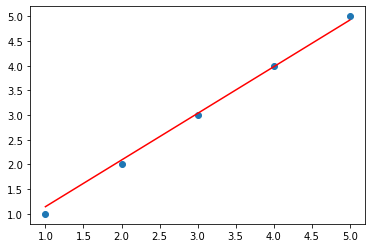

In [9]:
for i in range(100):
    with tf.GradientTape() as tape:
        #가설 설정
        hypothesis = W * x_data + b
        # Cost 함수 설정
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W, b]) # gradient 계산
    
    learning_rate = 0.01
    # 가중치 업데이트
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.show()
